# Rodrigo Barraza's Inscriptions: Blip 2 Single Captioning
This notebook is used to generate a caption on any given image.

- Requires 16GB+ of VRAM
- Requires 32GB+ of RAM
- Models load anywhere between one to three minutes on a 4090

In [ ]:
!pip3 install salesforce-lavis --upgrade
!pip3 install validators

In [1]:
import sys
import validators
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

/home/rodrigo/miniconda3/envs/blip2demo/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Setup device to use and load BLIP2 captioning model 

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    # name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
    # name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
    # name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
    name="blip2_opt", model_type="caption_coco_opt6.7b", is_eval=True, device=device
    # name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
    # name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
    # name="blip2_t5", model_type="pretrain_flant5xxl", is_eval=True, device=device
)

vis_processors.keys()

Position interpolate from 16x16 to 26x26


Loading checkpoint shards: 100%|██████████| 2/2 [00:19<00:00,  9.52s/it]


dict_keys(['train', 'eval'])

#### Load Example Image and Generate

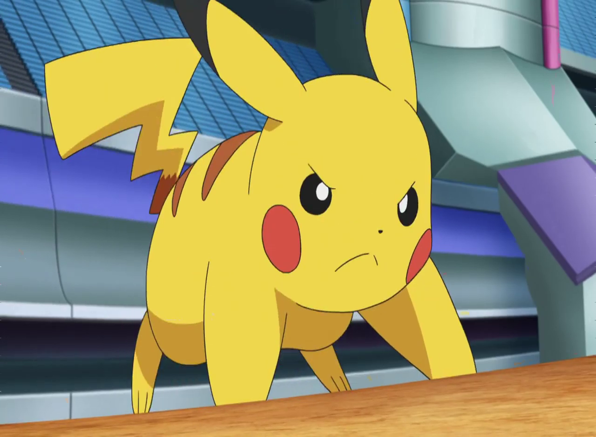

['pikachu in the anime pokemon the first movie']

In [5]:
image_url_or_path = 'https://archives.bulbagarden.net/media/upload/thumb/4/49/Ash_Pikachu.png/1200px-Ash_Pikachu.png'

if (validators.url(image_url_or_path)):
    raw_image = Image.open(requests.get(image_url_or_path, stream=True).raw).convert('RGB')
else:
    raw_image = Image.open(image_url_or_path).convert('RGB')  

display(raw_image.resize((596, 437)))
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image})

#### generate multiple captions using nucleus sampling

In [ ]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=20)

#### instructed zero-shot vision-to-language generation

In [ ]:
model.generate({"image": image, "prompt": "is there flower. Answer:"})

In [ ]:
model.generate({
    "image": image,
    "prompt": "Question: who is this? Answer: it's a dragon. Question: what color is it?"})

In [ ]:
context = [
    ("what color is the bricks?", "red"),
    ("what is not red?", "a white dog"),
]
question = "what is not bricks or white dog?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

In [ ]:
model.generate(
    {
    "image": image,
    "prompt": prompt
    },
    use_nucleus_sampling=False,
)